In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DATA/flipkart.csv')
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [3]:
df.dropna()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [4]:
#seems like there is no null values

<AxesSubplot:xlabel='rating', ylabel='count'>

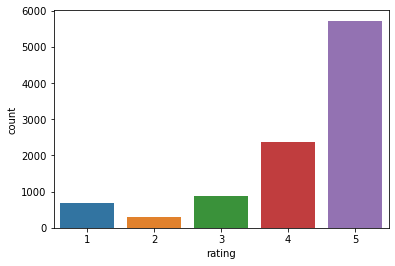

In [5]:
sns.countplot(x='rating',data=df)

In [6]:
rating_count=[len(df[df['rating']==1]),len(df[df.rating==2]),len(df[df.rating==3]),len(df[df.rating==4]),len(df[df.rating==5])]
rating_count

[691, 310, 884, 2365, 5726]

In [7]:
rating_count=pd.DataFrame(rating_count)
rating_count.index=range(1,6)
rating_count.columns=['count']
rating_count

,count
1,691
2,310
3,884
4,2365
5,5726


([<matplotlib.patches.Wedge at 0x1f62e99bdf0>,
 [Text(1.0740587316101442, 0.23748229629176265, '1'),
  Text(0.9475067468123005, 0.5587763101144958, '2'),
  Text(0.6761230639158081, 0.8676736727832073, '3'),
  Text(-0.3887445385535908, 1.0290178247944766, '4'),
  Text(-0.25335293217233035, -1.0704262196712497, '5')])

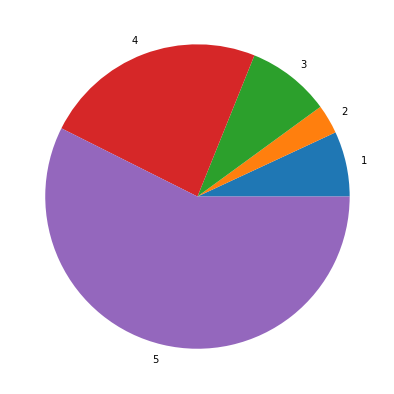

In [8]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x='count',data=rating_count,labels=rating_count.index)

## NLP

In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from string import punctuation


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
for i in range(len(df)):
    df['review'][i]=df['review'][i][:-9]
print(df.head())

C:\Users\User\AppData\Local\Temp\ipykernel_1108\669565201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i]=df['review'][i][:-9]


                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5


In [13]:
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,Good,5
9972,Everything is amazimg but the built is very li...,5
9973,Good,5
9974,Best headphone i have ever used....,5


In [14]:
list_of_words=[]
for i in range(len(df)):
    for word in df['review'][i].translate(str.maketrans('','',punctuation)).split(' '):
        list_of_words.append(word.lower())
set_of_words=list(set(list_of_words))

In [15]:
set_of_words

['',
 'purposeoverall',
 'terrible',
 'superi',
 'farbut',
 'witch',
 '3good',
 'elegantadjustable',
 'update',
 'flipkartoverall',
 'supereb',
 'optionthey',
 'geting',
 'crashed',
 'awsme',
 'v2',
 'ny',
 'quality2size',
 'designs',
 'wastage',
 'weekpros1',
 'prospect',
 '😊🤟😊🤩',
 '10102',
 'nly',
 'it3',
 'noisy',
 'standard',
 'cubs',
 'thatnice',
 'brother',
 'beside',
 'minuets',
 'bassdecent',
 'cushan',
 '700',
 'mass',
 'portrest',
 'goodbataty',
 'actual',
 'eyes',
 'idont',
 'gohighly',
 'uffff',
 'much😀',
 'headphonespls',
 '😎😎😎',
 'okey',
 'itamazing',
 'store',
 'headfon',
 'video',
 'shakes',
 'spent',
 '2bluetooth',
 'cushioningoverall',
 'lookingthe',
 'proves',
 'chargergr8gonna',
 'basssuperb',
 'priceno',
 'attractive',
 'mobile',
 'built',
 'vibration',
 'packingjust',
 'pinna',
 'areahowever',
 'rangepros',
 'rangebut',
 'indeed',
 'boatrokers',
 'realm',
 'gamingthe',
 'fantabulously',
 'nutshell',
 '14062019',
 'directly',
 'but',
 'july',
 'monthpros1',
 'xtrem

In [16]:
filtered_words=[]

for word in set_of_words:
    if word not in stopwords:
        filtered_words.append(word)
        
filtered_words=filtered_words[1:]

In [17]:
tok=Tokenizer()
all_vocab=list(filtered_words)
tok.fit_on_texts(all_vocab)

In [18]:
# padding sequences
review_tok=tok.texts_to_sequences(df['review'])
review_tok=pad_sequences(review_tok,padding='post',value=0)
review_tok

array([[7004, 6553, 7006, ...,    0,    0,    0],
       [8010,  525, 8150, ...,    0,    0,    0],
       [8010,  525, 9633, ...,    0,    0,    0],
       ...,
       [8300,    0,    0, ...,    0,    0,    0],
       [6017, 6934, 6252, ...,    0,    0,    0],
       [7004,    0,    0, ...,    0,    0,    0]])

In [24]:
maxlen=len(review_tok[0])

In [36]:
labels=[]
for i in range(len(df)):
    if df['rating'][i]>3:
        labels.append(1)
    else:
        labels.append(0)
labels=np.array(labels)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
import tensorflow as tf

In [48]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=maxlen),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [37]:
X_train=review_tok[:8000]
X_test=review_tok[8000:]
y_train=labels[:8000]
y_test=labels[8000:]

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 68, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 68, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
250/250 [==============================] - 10s 21ms/step - loss: 0.5199 - accuracy: 0.8355
Epoch 2/3
250/250 [==============================] - 4s 18ms/step - loss: 0.2811 - accuracy: 0.8986
Epoch 3/3
250/250 [==============================] - 4s 17ms/step - loss: 0.2392 - accuracy: 0.9229


In [50]:
result=model.evaluate(X_test,y_test)

62/62 [==============================] - 1s 6ms/step - loss: 0.3182 - accuracy: 0.8760
